## Import des libs

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Import des données

Pour commencer, nous devons spécifier quelques paramètres pour l'apprentissage:
<ul>
    <li>La longueur et la largeur des images. </li>
    <li>La taille du batch.</li>
</ul>

In [71]:
image_h = 350
image_w = 350
batch_s = 32

In [86]:
import tensorflow as tf

data_dir = "C:/Users/oscar/Desktop/Dataset/"

train_set = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=(image_h, image_w),
        batch_size=batch_s,
    )


test_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(image_h, image_w),
    batch_size=batch_s,
)



Found 41399 files belonging to 5 classes.
Using 33120 files for training.
Found 41399 files belonging to 5 classes.
Using 8279 files for validation.


## Visualisation des données

In [87]:
class_names = test_set.class_names
print(class_names)

['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


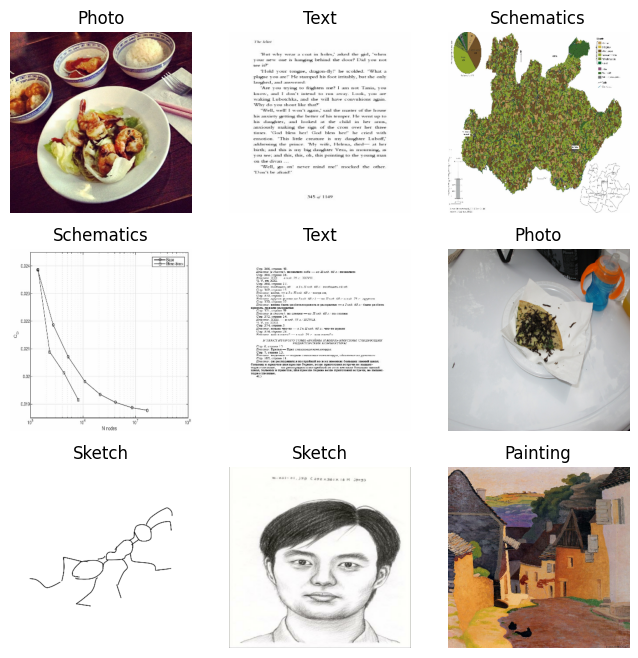

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):
    for i in range(9):
        ax =  plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8')) 
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [89]:
print(type(train_set))
images, labels =  next(iter(train_set))
print(images.shape)
print(labels.shape)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
(32, 350, 350, 3)
(32,)


## Config entrainement

In [90]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE)

## Normalisation des données

In [93]:
num_classes = 5 # Nombre de classes et donc aussi nombre de neurones dans la dernière couche
model = Sequential()

In [94]:
model.add(layers.experimental.preprocessing.Rescaling(
    1./255
    )
)